In [ ]:
!pip install praw

import praw
import pprint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
SECRET="igWO0sftHLYwZ6S3sB8gwY66xtPcAA"
APP_ID="XLNA_xSQJDdsJ4eRspez5w"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

In [ ]:
SUBMISSION_URL="https://www.reddit.com/r/electricvehicles/comments/14hizvc/putting_aside_musk_is_a_tesla_actually_a_good_car/"
submission = reddit.submission(url=SUBMISSION_URL)

In [ ]:
#exploratory is week 10
#1. Analysis of popular words and phrases


#2. Analysis of word associations/correlations - author? stats?
#3. Time-series analysis of comments/posts


#text mining/Sentiment analysis is week 10-11

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import string
import nltk
from nltk.util import ngrams

#removal of stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
words = []

for top_level_comment in submission.comments:
  if isinstance(top_level_comment, praw.models.Comment):
    comment_text = top_level_comment.body

    tokens = comment_text.lower().split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]
    filtered_tokens = [word for word in tokens if word not in stop_words]

    words.extend(filtered_tokens)

word_counts = Counter(words)

top_words = word_counts.most_common(15)
print("Top words: ", top_words)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Top words:  [('car', 178), ('tesla', 157), ('cars', 99), ('model', 88), ('quality', 78), ('issues', 67), ('one', 67), ('like', 66), ('it’s', 66), ('3', 58), ('best', 56), ('good', 47), ('', 46), ('great', 46), ('service', 44)]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

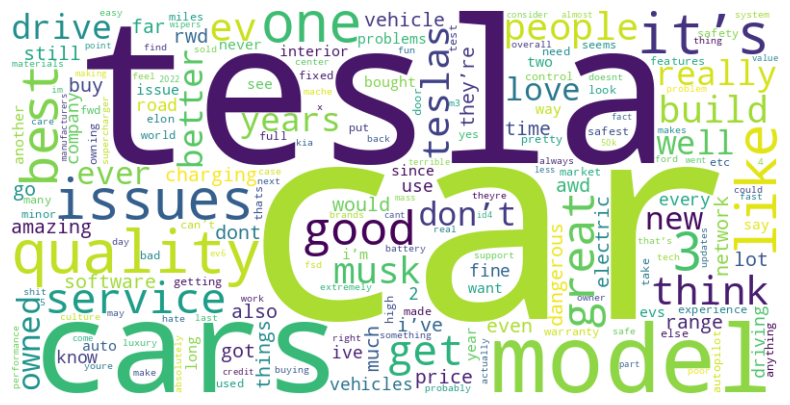

In [ ]:
word_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
phrases = []

for top_level_comment in submission.comments:
    if isinstance(top_level_comment, praw.models.Comment):
        comment_text = top_level_comment.body.lower()

        comment_text = comment_text.translate(str.maketrans('', '', string.punctuation))
        bi_grams = ngrams(comment_text.split(), 2)

        phrases.extend([' '.join(gram) for gram in bi_grams if gram[0] not in stop_words and gram[1] not in stop_words])

phrase_counts = Counter(phrases)

top_phrases = phrase_counts.most_common(15)
print("Top phrases: ", top_phrases)


Top phrases:  [('model 3', 39), ('build quality', 27), ('best car', 15), ('charging network', 10), ('ever owned', 9), ('good car', 9), ('electric car', 9), ('awd awd', 9), ('service center', 8), ('supercharger network', 8), ('car i’ve', 8), ('i’ve ever', 8), ('rwd rwd', 8), ('test drive', 7), ('things like', 7)]


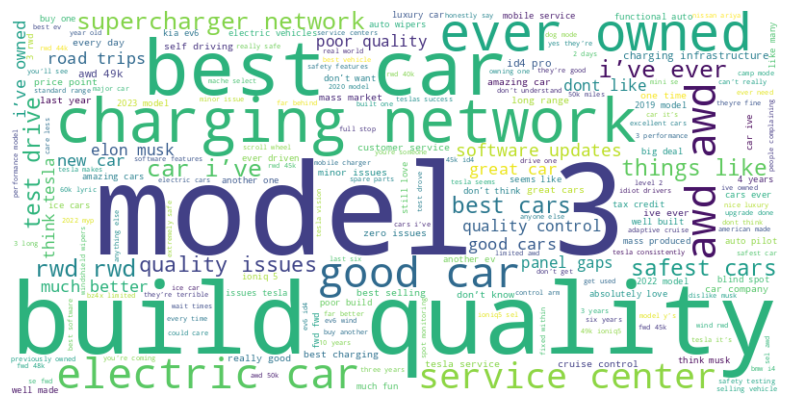

In [ ]:
phrase_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(phrase_counts)
plt.figure(figsize=(10, 5))
plt.imshow(phrase_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd

comments = []

# Recursively fetch comments due to too many comments
def extract_comments(comments):
    all_comments = []
    for comment in comments:
        if isinstance(comment, praw.models.Comment):
            all_comments.append({
                'created_utc': comment.created_utc,
                'body': comment.body
            })
        elif isinstance(comment, praw.models.MoreComments):
            all_comments.extend(extract_comments(comment.comments()))
    return all_comments

comments = extract_comments(submission.comments)

comments_df = pd.DataFrame(comments)
comments_df['created_utc'] = pd.to_datetime(comments_df['created_utc'], unit = 's')
comments_df.set_index('created_utc', inplace = True)
comment_counts = comments_df.resample('D').size()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

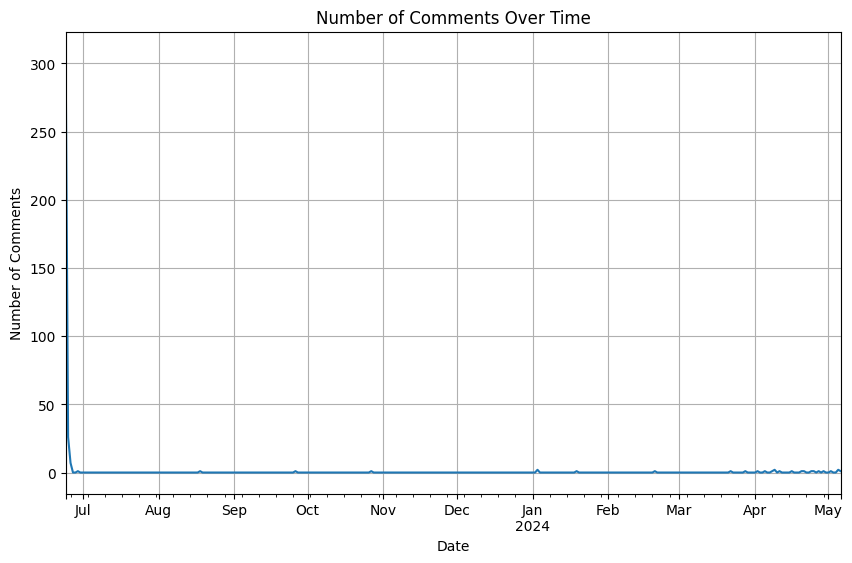

In [ ]:
plt.figure(figsize=(10, 6))
comment_counts.plot()
plt.title('Number of Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

In [ ]:
#number of comments by the top authors?

In [ ]:
comments_df.describe()

,body
count,368
unique,368
top,They’re mass production cars. Some will have i...
freq,1


In [ ]:
#Text Mining - LDA

!pip install gensim
import gensim
import gensim.corpora as corpora

# Tokenize comments
documents = [comment.split() for comment in words]
vocab = corpora.Dictionary(documents)
corpus = [vocab.doc2bow(text) for text in documents]

num_topics = 4
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
print(lda.print_topics())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.036*"one" + 0.026*"best" + 0.023*"like" + 0.020*"get" + 0.019*"3" + 0.015*"issues" + 0.013*"build" + 0.012*"network" + 0.011*"cheap" + 0.011*"reliable"'), (1, '0.015*"years" + 0.014*"service" + 0.012*"drive" + 0.011*"good" + 0.011*"price" + 0.010*"buy" + 0.010*"else" + 0.010*"far" + 0.009*"control" + 0.008*"buying"'), (2, '0.073*"car" + 0.043*"quality" + 0.027*"better" + 0.024*"model" + 0.021*"tesla" + 0.018*"it’s" + 0.018*"put" + 0.016*"would" + 0.016*"year" + 0.012*"people"'), (3, '0.045*"cars" + 0.035*"tesla" + 0.031*"teslas" + 0.028*"great" + 0.014*"company" + 0.014*"ev" + 0.013*"another" + 0.013*"know" + 0.013*"used" + 0.012*"think"')]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

#Evaluation of topic coherence
coherence_model = CoherenceModel(model=lda, texts=documents, dictionary=vocab, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Topic Coherence Score: {coherence_score}")

for topic_id, topic in lda.print_topics():
    print(f"Topic {topic_id + 1}: {topic}")

#very good coherence score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic Coherence Score: 0.8187233635941433
Topic 1: 0.036*"one" + 0.026*"best" + 0.023*"like" + 0.020*"get" + 0.019*"3" + 0.015*"issues" + 0.013*"build" + 0.012*"network" + 0.011*"cheap" + 0.011*"reliable"
Topic 2: 0.015*"years" + 0.014*"service" + 0.012*"drive" + 0.011*"good" + 0.011*"price" + 0.010*"buy" + 0.010*"else" + 0.010*"far" + 0.009*"control" + 0.008*"buying"
Topic 3: 0.073*"car" + 0.043*"quality" + 0.027*"better" + 0.024*"model" + 0.021*"tesla" + 0.018*"it’s" + 0.018*"put" + 0.016*"would" + 0.016*"year" + 0.012*"people"
Topic 4: 0.045*"cars" + 0.035*"tesla" + 0.031*"teslas" + 0.028*"great" + 0.014*"company" + 0.014*"ev" + 0.013*"another" + 0.013*"know" + 0.013*"used" + 0.012*"think"


In [ ]:
!pip install pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, vocab)
pyLDAvis.display(vis)

#corpus (document term matrix) is a math representation of a comments (row) and token (column)
#it captures the raw frequency of the tokens, which can be used for text analysis

#vocab is the dictionary of comments (terms)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

#Analyze the sentiment for each comment
sentiments = []
for comment in submission.comments.list():
    #Filter out the deleted comments
    if not hasattr(comment, 'body'):
        continue

    #Sentiment analysis
    sentiment_scores = sid.polarity_scores(comment.body)
    sentiments.append(sentiment_scores)

#overall sentiment scores
compound_scores = [score['compound'] for score in sentiments]
avg_sentiment = sum(compound_scores) / len(compound_scores)
print("Average Sentiment Score:", avg_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Sentiment Score: 0.1738306748466255


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



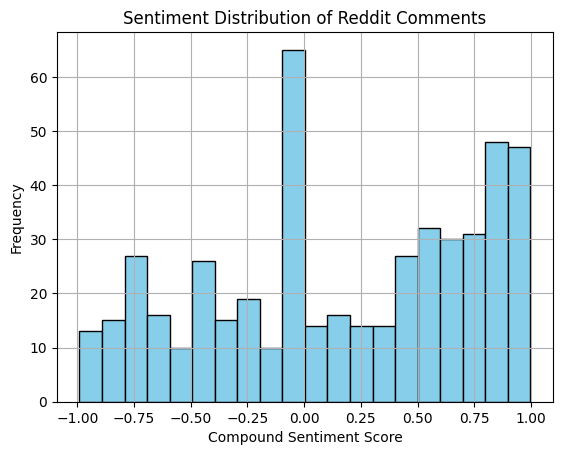

In [ ]:
comments = []
for comment in reddit.submission(url=SUBMISSION_URL).comments.list():
    if hasattr(comment, 'body'):
        comments.append(comment.body)

sid = SentimentIntensityAnalyzer()
sentiments = [sid.polarity_scores(comment)['compound'] for comment in comments]

plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Reddit Comments')
plt.grid(True)
plt.show()

In [ ]:
data = []

# Sentiment analysis for each comment and store author and sentiment score
for comment in reddit.submission(url=SUBMISSION_URL).comments.list():
    if hasattr(comment, 'body') and hasattr(comment, 'author') and comment.author is not None:
        owner = comment.author.name  # Assuming owner is the author of the comment
        sentiment_score = sid.polarity_scores(comment.body)['compound']
        data.append((owner, sentiment_score))


df = pd.DataFrame(data, columns=['Author', 'Sentiment Score'])
df_avg_sentiment = df.groupby('Author').mean().reset_index()
print(df_avg_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                Author  Sentiment Score
0               03Void          -0.9670
1            5256chuck          -0.3818
2        Acct_For_Sale           0.2382
3    Actual-Entry-2095           0.6652
4              Alarmmy           0.0617
..                 ...              ...
327        wootnootlol           0.1280
328      xstreamReddit           0.7489
329     yeetgodblender          -0.5719
330       youtheotube2           0.0000
331     zacharyswanson          -0.6001

[332 rows x 2 columns]


In [ ]:
sorted_df = df.sort_values(by='Sentiment Score', ascending=False)
sorted_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author,Sentiment Score
80,Shootels,0.9976
351,iamozymandiusking,0.9972
36,cantanko,0.9911
236,tankerdudeucsc,0.9897
87,omgitsme17,0.9895
...,...,...
57,dawnsearlylight,-0.9625
185,jaymansi,-0.9625
23,03Void,-0.9670
143,Snoo93079,-0.9703
